## Homework 2
### Luke Roe


## 1)
The complexity of the KMeans algorithm is O(n * k * i * d) where n is the number of samples, k is the number of clusters, i is the number of iterations, and d is the number of features. The complexity of bisecting KMeans is O((k-1)i * n) where k is the number of clusters and i is the number of iterations.



In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.datasets import load_iris

In [91]:
# load data
digits = load_digits()
X = digits.data
y = digits.target

In [92]:
# scale data
mmscaler = MinMaxScaler()
Xmm = mmscaler.fit_transform(X)
ssscaler = StandardScaler()
Xss = ssscaler.fit_transform(X)

In [93]:
def resolve_masking(y_pred, y_true):
    pred_labels = np.zeros_like(y_true)

    for i in range(len(np.unique(y_pred))):
        mask = (y_pred == i)
        pred_labels[mask] = mode(y_true[mask], keepdims=True)[0]
    
    return pred_labels

In [94]:
def doKmeans(X, y, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    y_pred = resolve_masking(y_pred, y)
    return accuracy_score(y, y_pred), kmeans

In [95]:
def doBisectingKmeans(X, y, n_clusters=10):
    bkmeans = BisectingKMeans(n_clusters=n_clusters, random_state=0)
    bkmeans.fit(X)
    y_pred = bkmeans.labels_
    y_pred = resolve_masking(y_pred, y)
    return accuracy_score(y, y_pred), bkmeans

In [96]:
print("Kmeans with MinMaxScaler: ", doKmeans(Xmm, y)[0])
print("Kmeans with StandardScaler: ", doKmeans(Xss, y)[0])
print("Kmeans with Raw Data: ", doKmeans(X, y)[0])

print("Bisecting Kmeans with MinMaxScaler: ", doBisectingKmeans(Xmm, y)[0])
print("Bisecting Kmeans with StandardScaler: ", doBisectingKmeans(Xss, y)[0])
print("Bisecting Kmeans with Raw Data: ", doBisectingKmeans(X, y)[0])

Kmeans with MinMaxScaler:  0.7946577629382304
Kmeans with StandardScaler:  0.7100723427935448
Kmeans with Raw Data:  0.7440178074568725
Bisecting Kmeans with MinMaxScaler:  0.7250973845297718
Bisecting Kmeans with StandardScaler:  0.6076794657762938
Bisecting Kmeans with Raw Data:  0.7111853088480802


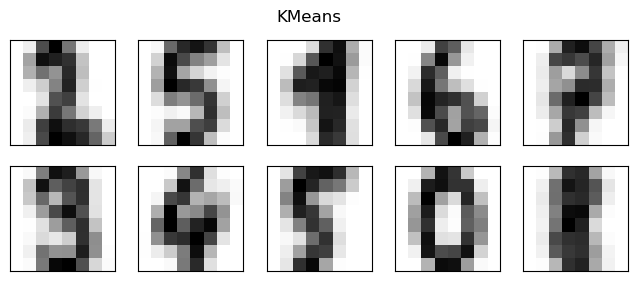

In [103]:
# visualize the results, use resolve mapping to map the cluster to the true label
def visualize_kmeans(kmeans, X, y):
    y_pred = kmeans.labels_
    y_pred = resolve_masking(y_pred, y)
    fig, ax = plt.subplots(2, 5, figsize=(8, 3))
    centers = kmeans.cluster_centers_.reshape(10, 8, 8)
    for axi, center in zip(ax.flat, centers):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

    
    plt.suptitle('KMeans')

    plt.show()

visualize_kmeans(doKmeans(X, y)[1], X, y)

In [51]:
# import vehicles.csv
df = pd.read_csv('vehicles.csv')
df = df.dropna()
df_y = df['Type']
# rename first column to 'Model'
df = df.rename(columns={df.columns[0]: 'Model'})
df = df.drop(columns=['Type'])
unique_y = df_y.unique()
print(unique_y)

['Sedan' 'SUV' 'Sports' 'Wagon' 'Minivan']


In [106]:
# scale data, some data is text data and needs to be encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Model'] = le.fit_transform(df['Model'])
df_y = le.fit_transform(df_y)
df_no_model = df.drop(columns=['Model'])
ssscaler = StandardScaler()
df_ss_with_model = ssscaler.fit_transform(df)
df_ss_no_model = ssscaler.fit_transform(df_no_model)
mmscaler = MinMaxScaler()
df_mm_with_model = mmscaler.fit_transform(df)
df_mm_no_model = mmscaler.fit_transform(df_no_model)

In [107]:
print("Kmeans with MinMaxScaler: ", doKmeans(df_mm_with_model, df_y)[0])
print("Kmeans with StandardScaler: ", doKmeans(df_ss_with_model, df_y)[0])
print("Kmeans with Raw Data: ", doKmeans(df, df_y)[0])
print("Kmeans with MinMaxScaler and no Model: ", doKmeans(df_mm_no_model, df_y)[0])
print("Kmeans with StandardScaler and no Model: ", doKmeans(df_ss_no_model, df_y)[0])
print("Kmeans with Raw Data and no Model: ", doKmeans(df_no_model, df_y)[0])


Kmeans with MinMaxScaler:  0.6692506459948321
Kmeans with StandardScaler:  0.661498708010336
Kmeans with Raw Data:  0.6201550387596899
Kmeans with MinMaxScaler and no Model:  0.7080103359173127
Kmeans with StandardScaler and no Model:  0.6847545219638242
Kmeans with Raw Data and no Model:  0.6201550387596899


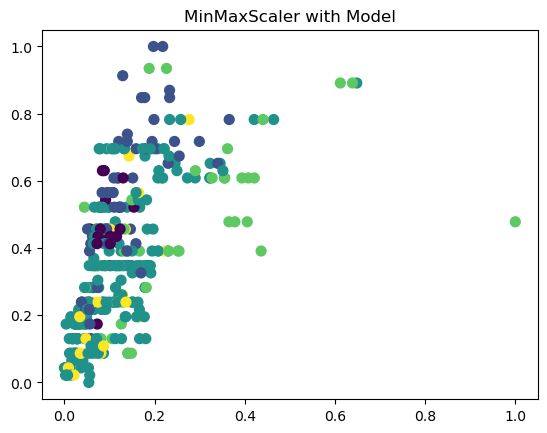

In [114]:
# plot the data with the first two features
def plot_data(X, y, title):
    plt.scatter(X[:, 2], X[:, 4], c=y, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

plot_data(df_mm_no_model, df_y, "MinMaxScaler with Model")

In [166]:
# do kmeans with iris
from time import time
iris = load_iris()
X = iris.data
y = iris.target
mmscaler = MinMaxScaler()
Xmm = mmscaler.fit_transform(X)
ssscaler = StandardScaler()
Xss = ssscaler.fit_transform(X)


In [197]:
print("Kmeans with MinMaxScaler: ", doKmeans(Xmm, y, 3)[0])
print("Kmeans with StandardScaler: ", doKmeans(Xss, y, 3)[0])
print("Kmeans with Raw Data: ", doKmeans(X, y, 3)[0])


Kmeans with MinMaxScaler:  0.88
Kmeans with StandardScaler:  0.8333333333333334
Kmeans with Raw Data:  0.8866666666666667


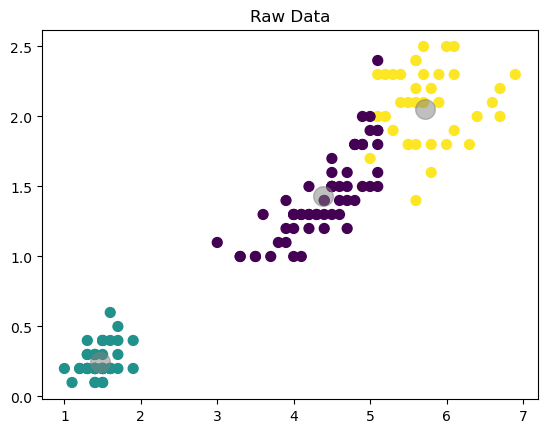

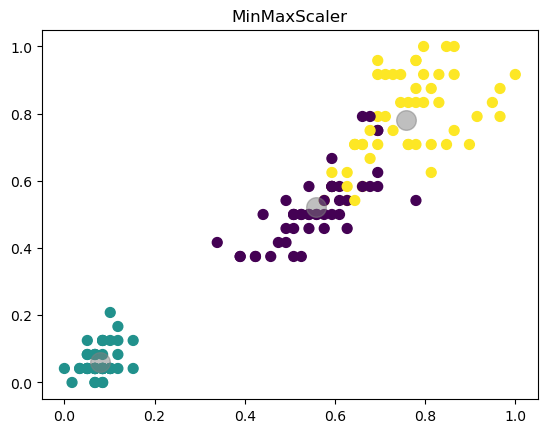

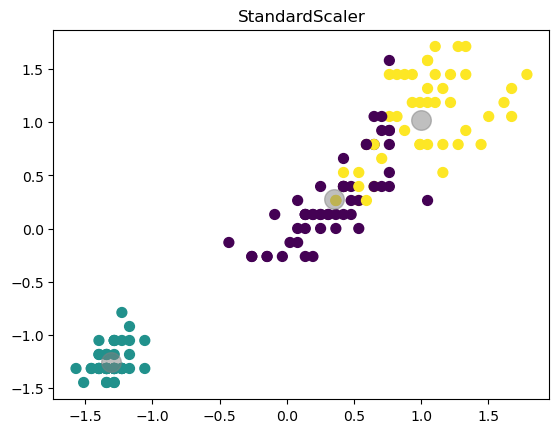

In [212]:
# plot the results
def plot_iris(X, y, title):
    kmeans = KMeans(3, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    
    
    plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, cmap='viridis', s=50)
    
    # Plotting the centroids
    plt.scatter(centers[:, 2], centers[:, 3], c='gray', s=200, alpha=0.5, marker='o')
    
    plt.title(title)
    plt.show()

plot_iris(X, y, "Raw Data")
plot_iris(Xmm, y, "MinMaxScaler")
plot_iris(Xss, y, "StandardScaler")

# Custom K Means
### Steps

1. Pick k random points as the initial centroids
2. Assign each point to the nearest centroid using cosine distance
3. Update the centroids
4. Iterate until the centroids do not change or max iterations reached


In [115]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


In [116]:

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        similarities = [cosine_similarity(x, centroid) for centroid in centroids]
        closest = np.argmax(similarities) 
        clusters.append(closest)
    return np.array(clusters)

In [123]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) == 0: 
            new_centroids.append(np.zeros(X.shape[1]))
        else:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [189]:
# track the number of iterations and time it takes to converge 
from time import time
start = time()
def kmeans_cosine(X, k, max_iters=100):
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[random_indices]

    for iteration in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        
        centroids = new_centroids
    clusters = resolve_masking(clusters, y)
    return clusters, centroids, iteration

k = 3
clusters, centroids, iterations = kmeans_cosine(X, k)
print("Cosine Similarity Kmeans with Raw Data: ", accuracy_score(y, clusters))
print("Time to converge: ", time() - start)
print("iterations: ", iterations)

Cosine Similarity Kmeans with Raw Data:  0.9733333333333334
Time to converge:  0.017200946807861328
iterations:  5


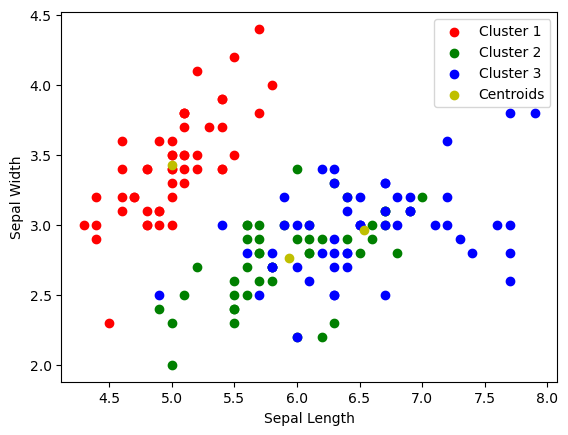

In [179]:
# plot the clusters
plt.scatter(X[clusters == 0][:, 0], X[clusters == 0][:, 1], color='r', label='Cluster 1')
plt.scatter(X[clusters == 1][:, 0], X[clusters == 1][:, 1], color='g', label='Cluster 2')
plt.scatter(X[clusters == 2][:, 0], X[clusters == 2][:, 1], color='b', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], color='y', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


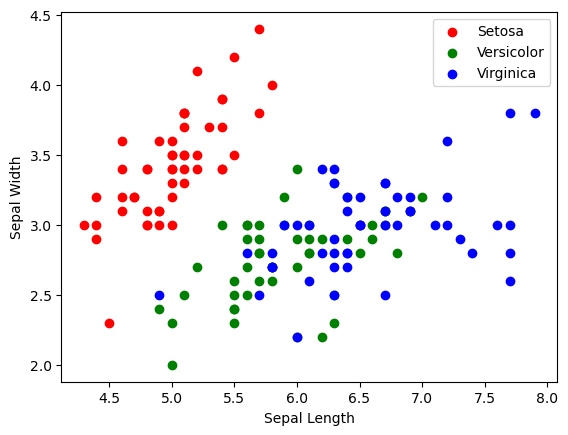

In [177]:
# plot the data with the true labels
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='Versicolor')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='b', label='Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
